<a href="https://colab.research.google.com/github/loulou-lee/DeepLearning/blob/main/nlp14grapheme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 자소 단위로 분리한 후 텍스트 생성 모델
!pip install jamotools 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import jamotools
import tensorflow as tf
import numpy as np

path_to_file = tf.keras.utils.get_file("toji.txt", "https://raw.githubusercontent.com/pykwon/python/master/testdata_utf8/rnn_short_toji.txt")
train_text = open(path_to_file, 'rb').read().decode(encoding='utf-8')
s = train_text[:100]
print(s)

s_split = jamotools.split_syllables(s)
print(s_split)

s2 = jamotools.join_jamos(s_split)
print(s2)
print(s == s2)

818364/818364 [==============================] - 0s 0us/step
귀녀의 모습을 한번 쳐다보고 떠나려 했다. 집안을 이리저리 기웃거리던 강표수는 윤씨부
인에게 인사를 올리고 중문을 나서는  치수 뒷모습을 보았다. 실망에  얼굴이 일그러지면서 
ㄱㅟㄴㅕㅇㅢ ㅁㅗㅅㅡㅂㅇㅡㄹ ㅎㅏㄴㅂㅓㄴ ㅊㅕㄷㅏㅂㅗㄱㅗ ㄸㅓㄴㅏㄹㅕ ㅎㅐㅆㄷㅏ. ㅈㅣㅂㅇㅏㄴㅇㅡㄹ ㅇㅣㄹㅣㅈㅓㄹㅣ ㄱㅣㅇㅜㅅㄱㅓㄹㅣㄷㅓㄴ ㄱㅏㅇㅍㅛㅅㅜㄴㅡㄴ ㅇㅠㄴㅆㅣㅂㅜ
ㅇㅣㄴㅇㅔㄱㅔ ㅇㅣㄴㅅㅏㄹㅡㄹ ㅇㅗㄹㄹㅣㄱㅗ ㅈㅜㅇㅁㅜㄴㅇㅡㄹ ㄴㅏㅅㅓㄴㅡㄴ  ㅊㅣㅅㅜ ㄷㅟㅅㅁㅗㅅㅡㅂㅇㅡㄹ ㅂㅗㅇㅏㅆㄷㅏ. ㅅㅣㄹㅁㅏㅇㅇㅔ  ㅇㅓㄹㄱㅜㄹㅇㅣ ㅇㅣㄹㄱㅡㄹㅓㅈㅣㅁㅕㄴㅅㅓ 
귀녀의 모습을 한번 쳐다보고 떠나려 했다. 집안을 이리저리 기웃거리던 강표수는 윤씨부
인에게 인사를 올리고 중문을 나서는  치수 뒷모습을 보았다. 실망에  얼굴이 일그러지면서 
True


In [3]:
# train_text로 자모단위 분리
train_text_x = jamotools.split_syllables(train_text)
vocab = sorted(set(train_text_x))
vocab.append('UNK') # 사전에 정의되지 않은 기호가 있는 경우 'UNK'로 사전에 등록
print(len(vocab))

char2idx = {u:i for i, u in enumerate(vocab)}
print(char2idx)
idx2char = np.array(vocab)
print(idx2char)
text_as_int = np.array([char2idx[c] for c in train_text_x])
print(text_as_int)

print(train_text_x[:20])
print(text_as_int[:20])

136
{'\n': 0, '\r': 1, ' ': 2, '!': 3, '"': 4, "'": 5, '(': 6, ')': 7, ',': 8, '-': 9, '.': 10, '0': 11, '1': 12, '2': 13, '3': 14, '4': 15, '5': 16, '6': 17, '7': 18, '8': 19, '9': 20, ':': 21, '?': 22, 'a': 23, 'd': 24, 'f': 25, 'l': 26, 'n': 27, 'p': 28, '‘': 29, '’': 30, '“': 31, '”': 32, '…': 33, '\u3000': 34, 'ㄱ': 35, 'ㄲ': 36, 'ㄳ': 37, 'ㄴ': 38, 'ㄵ': 39, 'ㄶ': 40, 'ㄷ': 41, 'ㄸ': 42, 'ㄹ': 43, 'ㄺ': 44, 'ㄻ': 45, 'ㄼ': 46, 'ㄽ': 47, 'ㄾ': 48, 'ㅀ': 49, 'ㅁ': 50, 'ㅂ': 51, 'ㅃ': 52, 'ㅄ': 53, 'ㅅ': 54, 'ㅆ': 55, 'ㅇ': 56, 'ㅈ': 57, 'ㅉ': 58, 'ㅊ': 59, 'ㅋ': 60, 'ㅌ': 61, 'ㅍ': 62, 'ㅎ': 63, 'ㅏ': 64, 'ㅐ': 65, 'ㅑ': 66, 'ㅒ': 67, 'ㅓ': 68, 'ㅔ': 69, 'ㅕ': 70, 'ㅖ': 71, 'ㅗ': 72, 'ㅘ': 73, 'ㅙ': 74, 'ㅚ': 75, 'ㅛ': 76, 'ㅜ': 77, 'ㅝ': 78, 'ㅞ': 79, 'ㅟ': 80, 'ㅠ': 81, 'ㅡ': 82, 'ㅢ': 83, 'ㅣ': 84, '主': 85, '事': 86, '亡': 87, '佛': 88, '刑': 89, '割': 90, '化': 91, '匠': 92, '善': 93, '地': 94, '壁': 95, '妄': 96, '婚': 97, '子': 98, '寺': 99, '工': 100, '常': 101, '役': 102, '情': 103, '惡': 104, '意': 105, '日': 106, '杖': 107, '水': 108, '池': 109

In [4]:
# 학습 데이터 생성
seq_length = 80
exam_per_epoch = len(text_as_int) // seq_length
print(exam_per_epoch) # 8636
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

char_dataset = char_dataset.batch(seq_length + 1, drop_remainder=True) # 처음 80개 자소와 그 뒤에 나올 정답이 될 1단어를 합쳐서 반환

for item in char_dataset.take(1):
  print(idx2char[item.numpy()])
  print(item.numpy())

def split_input_target2(chunk):
    return [chunk[:-1], chunk[-1]]

train_dataset = char_dataset.map(split_input_target2)

for x, y in train_dataset.take(1):
    print(idx2char[x.numpy()])
    print(x.numpy())
    print(idx2char[y.numpy()])
    print(y.numpy())

8636
['ㄱ' 'ㅟ' 'ㄴ' 'ㅕ' 'ㅇ' 'ㅢ' ' ' 'ㅁ' 'ㅗ' 'ㅅ' 'ㅡ' 'ㅂ' 'ㅇ' 'ㅡ' 'ㄹ' ' ' 'ㅎ' 'ㅏ'
 'ㄴ' 'ㅂ' 'ㅓ' 'ㄴ' ' ' 'ㅊ' 'ㅕ' 'ㄷ' 'ㅏ' 'ㅂ' 'ㅗ' 'ㄱ' 'ㅗ' ' ' 'ㄸ' 'ㅓ' 'ㄴ' 'ㅏ'
 'ㄹ' 'ㅕ' ' ' 'ㅎ' 'ㅐ' 'ㅆ' 'ㄷ' 'ㅏ' '.' ' ' 'ㅈ' 'ㅣ' 'ㅂ' 'ㅇ' 'ㅏ' 'ㄴ' 'ㅇ' 'ㅡ'
 'ㄹ' ' ' 'ㅇ' 'ㅣ' 'ㄹ' 'ㅣ' 'ㅈ' 'ㅓ' 'ㄹ' 'ㅣ' ' ' 'ㄱ' 'ㅣ' 'ㅇ' 'ㅜ' 'ㅅ' 'ㄱ' 'ㅓ'
 'ㄹ' 'ㅣ' 'ㄷ' 'ㅓ' 'ㄴ' ' ' 'ㄱ' 'ㅏ' 'ㅇ']
[35 80 38 70 56 83  2 50 72 54 82 51 56 82 43  2 63 64 38 51 68 38  2 59
 70 41 64 51 72 35 72  2 42 68 38 64 43 70  2 63 65 55 41 64 10  2 57 84
 51 56 64 38 56 82 43  2 56 84 43 84 57 68 43 84  2 35 84 56 77 54 35 68
 43 84 41 68 38  2 35 64 56]
['ㄱ' 'ㅟ' 'ㄴ' 'ㅕ' 'ㅇ' 'ㅢ' ' ' 'ㅁ' 'ㅗ' 'ㅅ' 'ㅡ' 'ㅂ' 'ㅇ' 'ㅡ' 'ㄹ' ' ' 'ㅎ' 'ㅏ'
 'ㄴ' 'ㅂ' 'ㅓ' 'ㄴ' ' ' 'ㅊ' 'ㅕ' 'ㄷ' 'ㅏ' 'ㅂ' 'ㅗ' 'ㄱ' 'ㅗ' ' ' 'ㄸ' 'ㅓ' 'ㄴ' 'ㅏ'
 'ㄹ' 'ㅕ' ' ' 'ㅎ' 'ㅐ' 'ㅆ' 'ㄷ' 'ㅏ' '.' ' ' 'ㅈ' 'ㅣ' 'ㅂ' 'ㅇ' 'ㅏ' 'ㄴ' 'ㅇ' 'ㅡ'
 'ㄹ' ' ' 'ㅇ' 'ㅣ' 'ㄹ' 'ㅣ' 'ㅈ' 'ㅓ' 'ㄹ' 'ㅣ' ' ' 'ㄱ' 'ㅣ' 'ㅇ' 'ㅜ' 'ㅅ' 'ㄱ' 'ㅓ'
 'ㄹ' 'ㅣ' 'ㄷ' 'ㅓ' 'ㄴ' ' ' 'ㄱ' 'ㅏ']
[35 80 38 70 56 83  2 50 72 54 82 51 56 82 43  2 63 64 38 51 68 38  2 59
 70 41 64 51 72 35

In [5]:
# model
BATCH_SIZE = 64
steps_per_epoch = exam_per_epoch // BATCH_SIZE
print('steps_per_epoch : ', steps_per_epoch)
train_dataset = train_dataset.shuffle(buffer_size=5000).batch(BATCH_SIZE, drop_remainder=True)

total_chars = len(vocab)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(total_chars, 100, input_length = seq_length),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units=256, activation='tanh'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=total_chars, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

steps_per_epoch :  134
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 80, 100)           13600     
                                                                 
 dropout (Dropout)           (None, 80, 100)           0         
                                                                 
 lstm (LSTM)                 (None, 256)               365568    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense (Dense)               (None, 256)               65792     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (Non

In [6]:
from keras.utils import pad_sequences

def testmodel(epoch, logs):
    if epoch % 5 != 0 and epoch != 49:
        return
    
    # 5의 배수 또는 49면 작업을 진행
    test_sentence = train_text[:48]
    test_sentence = jamotools.split_syllables(test_sentence)
    next_chars = 300
    for _ in range(next_chars):
        test_text_x = test_sentence[-seq_length:]
        test_text_x = np.array([char2idx[c] if c in char2idx else char2idx['UNK'] for c in test_text_x])
        test_text_x = pad_sequences([test_text_x], maxlen=seq_length, padding='pre', value=char2idx['UNK'])
        output_idx = np.argmax(model.predict(test_text_x), axis = -1)
        test_sentence += idx2char[output_idx[0]]
    print()
    print(jamotools.join_jamos(test_sentence))

# 모델을 학습시키며 모델이 생성한 결과물을 확인하기 위한 용도
testmodelcb = tf.keras.callbacks.LambdaCallback(on_epoch_end=testmodel)  # 에폭이 끝날 때 마다 testmodel 함수를 호출

# repeat() : input을 무한반복. 한번의 에폭의 끝과 다음 에폭의 시작에 상관없이 인자 만큼 반복
history = model.fit(train_dataset.repeat(), epochs=50, steps_per_epoch=steps_per_epoch, callbacks=[testmodelcb], verbose=2)

model.save('nlp14.hdf5')

# 임의의 문장을 사용해 학습된 모델로 새로운 글 생성
test_sentence = '최참판댁 사랑은 무인지경처럼 적막하다.'

test_sentence = jamotools.split_syllables(test_sentence)
print(test_sentence)

# 앞에서 작성한 for문 복붙
next_chars = 500
for _ in range(next_chars):
    test_text_x = test_sentence[-seq_length:]
    test_text_x = np.array([char2idx[c] if c in char2idx else char2idx['UNK'] for c in test_text_x])
    test_text_x = pad_sequences([test_text_x], maxlen=seq_length, padding='pre', value=char2idx['UNK'])
    output_idx = np.argmax(model.predict(test_text_x), axis = -1)
    test_sentence += idx2char[output_idx[0]]

print('글 생성 결과 ----------')
print(jamotools.join_jamos(test_sentence))

Epoch 1/50
1/1 [==============================] - 0s 19ms/step

                                                                                                                                                                                                                                                                                                            
134/134 - 32s - loss: 3.3560 - accuracy: 0.1123 - 32s/epoch - 239ms/step
Epoch 2/50
134/134 - 2s - loss: 2.8334 - accuracy: 0.2014 - 2s/epoch - 16ms/step
Epoch 3/50
134/134 - 2s - loss: 2.5288 - accuracy: 0.2565 - 2s/epoch - 15ms/step
Epoch 4/50
134/134 - 2s - loss: 2.4254 - accuracy: 0.2783 - 2s/epoch - 15ms/step
Epoch 5/50
134/134 - 2s - loss: 2.3570 - accuracy: 0.2919 - 2s/epoch - 15ms/step
Epoch 6/50
1/1 [==============================] - 0s 19ms/step

 가이는 가는 가는 가는 가는 가는 가는 가는 가는 가는 가는 가는 가는 가는 가는 가는 가는 가는 가는 가는 가는 가는 가는 가는 가는 가는 가는 가는 가는 가는 가는 가는 가는 가는 가는 가는 가는 가는 가는 가는 가는 가는 가는 가는 가는 가는 가는 가는 가는 간
134/134 - 18s - loss: 2

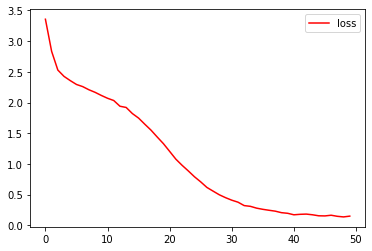

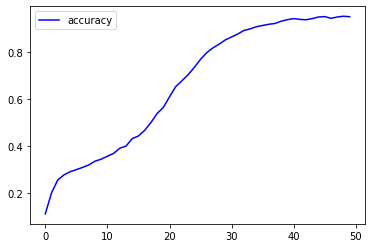

In [7]:
# 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], c='r', label='loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], c='b', label='accuracy')
plt.legend()
plt.show()